<a href="https://colab.research.google.com/github/harshbelani/M.Tech-DS/blob/master/Deep_Leaning/DL_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data=pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv')

data.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
data.shape

(201, 29)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [5]:
data['engine-size'].corr(data['price'])

0.8723351674455198

In [6]:
data[['engine-size', 'price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


In [7]:
data.corr()['price']

symboling           -0.082391
normalized-losses    0.133999
wheel-base           0.584642
length               0.690628
width                0.751265
height               0.135486
curb-weight          0.834415
engine-size          0.872335
bore                 0.543155
stroke               0.082310
compression-ratio    0.071107
horsepower           0.809575
peak-rpm            -0.101616
city-mpg            -0.686571
highway-mpg         -0.704692
price                1.000000
city-L/100km         0.789898
diesel               0.110326
gas                 -0.110326
Name: price, dtype: float64

In [8]:
data['peak-rpm'].dtype

dtype('float64')

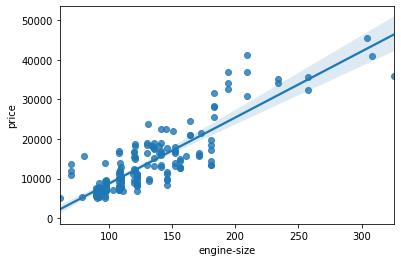

In [9]:
sns.regplot(data['engine-size'], data['price'])

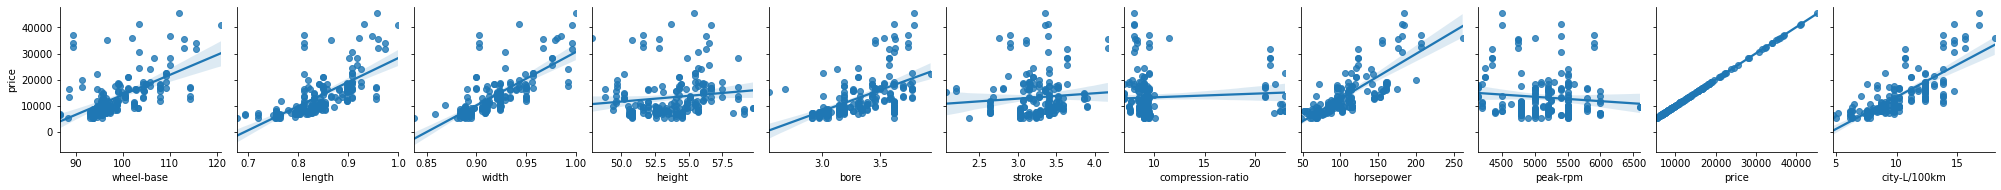

In [10]:
sns.pairplot(data, y_vars=['price'], x_vars=data.select_dtypes('float64').columns, kind='reg')

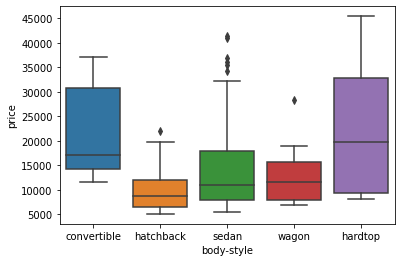

In [11]:
sns.boxplot(data['body-style'],data['price'])

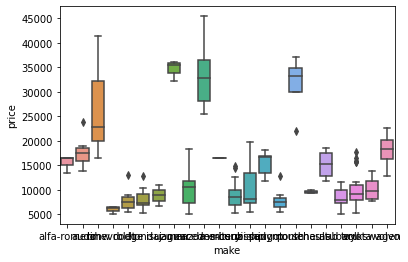

In [12]:
sns.boxplot(data['make'],data['price'])

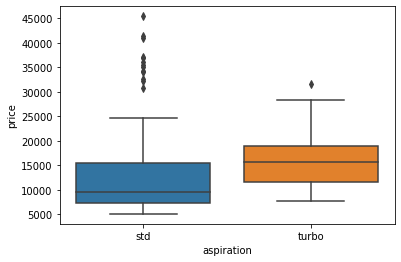

In [13]:
sns.boxplot(data['aspiration'],data['price'])

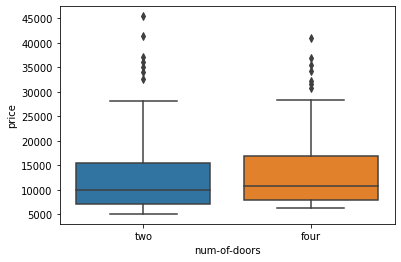

In [14]:
sns.boxplot(data['num-of-doors'],data['price'])

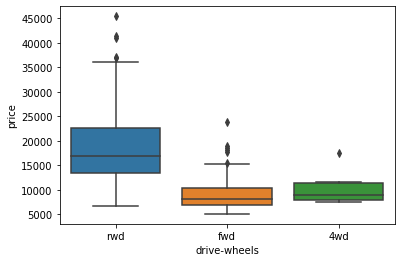

In [15]:
sns.boxplot(data['drive-wheels'],data['price'])

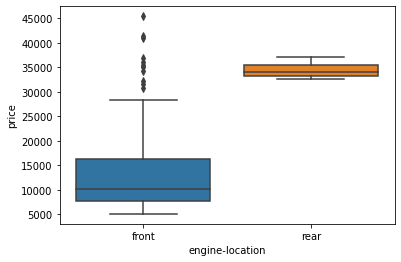

In [16]:
sns.boxplot(data['engine-location'],data['price'])

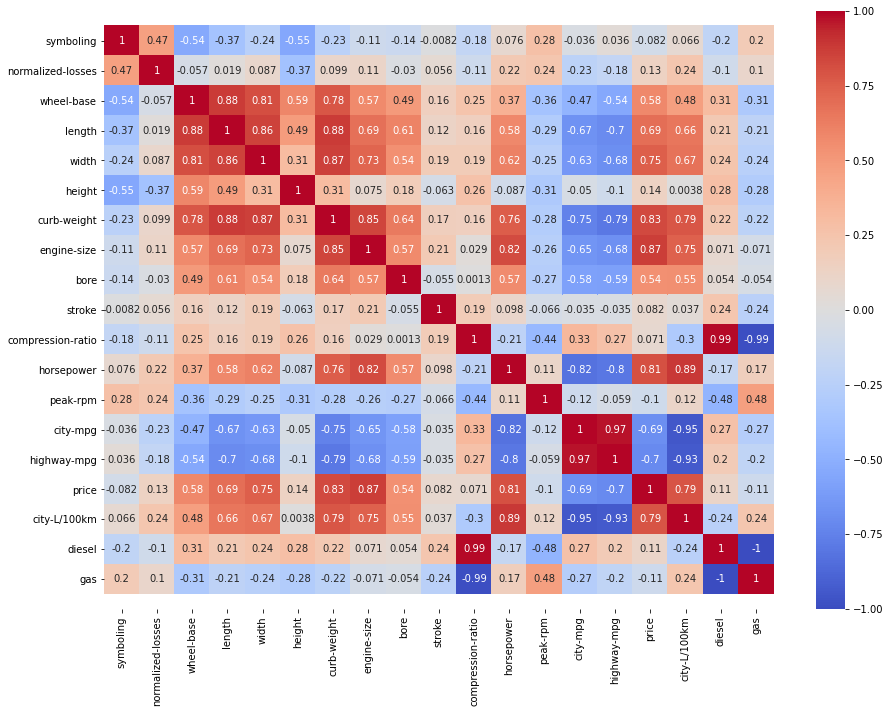

In [17]:
plt.figure(figsize=(15,11))
ax = sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

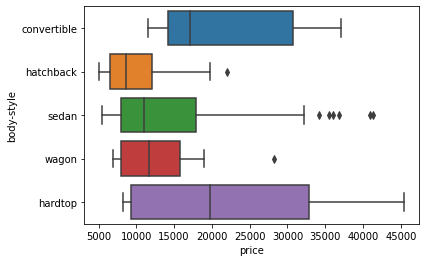

In [18]:
sns.boxplot(x=data["price"],y=data["body-style"])

In [19]:
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [20]:
data.describe(include='object')

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


In [21]:
cat_col=data.columns[data.dtypes=='object']
for i in cat_col:
    print(str(i)+'->column unique values are :\n'+str(data[i].value_counts()))

make->column unique values are :
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
volvo            11
peugot           11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
saab              6
audi              6
porsche           4
alfa-romero       3
chevrolet         3
jaguar            3
renault           2
isuzu             2
mercury           1
Name: make, dtype: int64
aspiration->column unique values are :
std      165
turbo     36
Name: aspiration, dtype: int64
num-of-doors->column unique values are :
four    115
two      86
Name: num-of-doors, dtype: int64
body-style->column unique values are :
sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64
drive-wheels->column unique values are :
fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64
engine-location->column unique values are

In [22]:
data.groupby('drive-wheels').mean()['price']

drive-wheels
4wd    10241.000000
fwd     9244.779661
rwd    19757.613333
Name: price, dtype: float64

In [24]:
cat_col=data.columns[data.dtypes=='object']
for i in cat_col:
    print(data.groupby(i).mean()['price']) 
    print('\n')

make
alfa-romero      15498.333333
audi             17859.166667
bmw              26118.750000
chevrolet         6007.000000
dodge             7875.444444
honda             8184.692308
isuzu             8916.500000
jaguar           34600.000000
mazda            10652.882353
mercedes-benz    33647.000000
mercury          16503.000000
mitsubishi        9239.769231
nissan           10415.666667
peugot           15489.090909
plymouth          7963.428571
porsche          31400.500000
renault           9595.000000
saab             15223.333333
subaru            8541.250000
toyota            9885.812500
volkswagen       10077.500000
volvo            18063.181818
Name: price, dtype: float64


aspiration
std      12542.181818
turbo    16254.805556
Name: price, dtype: float64


num-of-doors
four    13498.034783
two     12818.127907
Name: price, dtype: float64


body-style
convertible    21890.500000
hardtop        22208.500000
hatchback       9957.441176
sedan          14459.755319
wagon       

In [25]:
data_grouped=data.groupby(['drive-wheels','body-style']).mean()['price']
print(data_grouped)

drive-wheels  body-style 
4wd           hatchback       7603.000000
              sedan          12647.333333
              wagon           9095.750000
fwd           convertible    11595.000000
              hardtop         8249.000000
              hatchback       8396.387755
              sedan           9811.800000
              wagon           9997.333333
rwd           convertible    23949.600000
              hardtop        24202.714286
              hatchback      14337.777778
              sedan          21711.833333
              wagon          16994.222222
Name: price, dtype: float64


In [26]:
data_grouped.reset_index().pivot_table(index='drive-wheels',columns='body-style')

price                ...                            
body-style   convertible       hardtop  ...         sedan         wagon
drive-wheels                            ...                            
4wd                  NaN           NaN  ...  12647.333333   9095.750000
fwd              11595.0   8249.000000  ...   9811.800000   9997.333333
rwd              23949.6  24202.714286  ...  21711.833333  16994.222222

[3 rows x 5 columns]

In [27]:
data_grouped=data.groupby(['engine-location','engine-type']).mean()['price']
data_grouped.reset_index().pivot_table(index='engine-location',columns='engine-type')

price                ...                       
engine-type              dohc             l  ...          ohcv    rotor
engine-location                              ...                       
front            18116.416667  14627.583333  ...  25098.384615  13020.0
rear                      NaN           NaN  ...           NaN      NaN

[2 rows x 6 columns]

In [28]:
data_grouped_=data.groupby(['fuel-system','horsepower-binned']).mean()['price']
data_grouped_.reset_index().pivot_table(index='fuel-system',columns='horsepower-binned')

price                            
horsepower-binned          High           Low        Medium
fuel-system                                                
1bbl                        NaN   7555.545455           NaN
2bbl                        NaN   7433.203125           NaN
4bbl                        NaN  12145.000000           NaN
idi                         NaN  12047.800000  27209.200000
mfi                         NaN           NaN  12964.000000
mpfi               25899.130435  11871.904762  15716.659574
spdi                        NaN           NaN  10990.444444
spfi                        NaN  11048.000000           NaN

In [30]:
from scipy.stats import pearsonr
corr, _ = pearsonr(data['wheel-base'],data['price'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.585


In [31]:
from scipy.stats import f_oneway
f_oneway(data['price'][data['drive-wheels'] == '4wd'],
               data['price'][data['drive-wheels'] == 'fwd'],
               data['price'][data['drive-wheels'] == 'rwd'])

F_onewayResult(statistic=67.95406500780399, pvalue=3.3945443577151245e-23)